In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import humanize
import plotly.express as px
import warnings

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 80
warnings.filterwarnings('ignore')

In [3]:
apartments = pd.read_csv('../../data/processed/apartments.csv', low_memory=False)
usaquen =  apartments[(apartments['tipo_operacion'] == 'VENTA') & (apartments['localidad'] == 'USAQUEN') & (apartments['coords_modified'] == False)]
usaquen = usaquen.drop(columns=['precio_arriendo'])
usaquen.head()

codigo tipo_propiedad tipo_operacion  precio_venta   area  \
1    2510-M4156145    APARTAMENTO          VENTA  4.850000e+08   84.0   
4   10139-M3692828    APARTAMENTO          VENTA  1.570000e+09  213.0   
10  14733-M3655290    APARTAMENTO          VENTA  6.900000e+08  125.0   
13  13436-M4332087    APARTAMENTO          VENTA  3.774000e+08   83.0   
14  13436-M4332032    APARTAMENTO          VENTA  3.500000e+08   92.0   

    habitaciones  banos  administracion  parqueaderos         sector  ...  \
1            3.0    3.0        680000.0           1.0  SANTA BARBARA  ...   
4            3.0    4.0        994000.0           3.0        COUNTRY  ...   
10           4.0    5.0        500000.0           2.0        COUNTRY  ...   
13           2.0    2.0        533000.0           1.0       CEDRITOS  ...   
14           3.0    2.0        370000.0           1.0       CEDRITOS  ...   

    permite_mascotas gimnasio ascensor  conjunto_cerrado  coords_modified  \
1                0.0      0.0      1.0               1.0            False   
4                0.0      1.0      1.0               1.0            False   
10               0.0      1.0      1.0               1.0            False   
13               0.0      1.0      1.0               1.0            False   
14               0.0      1.0      1.0               1.0            False   

   localidad                   barrio estacion_tm_cercana  \
1    USAQUEN             SAN PATRICIO         Pepe Sierra   
4    USAQUEN                  GINEBRA               Prado   
10   USAQUEN         URB. SANTACOLOMA              Alcalá   
13   USAQUEN            CEDRO SALAZAR           Calle 142   
14   USAQUEN  VILLAS DEL MEDITERRANEO           Calle 161   

   distancia_estacion_tm_m is_cerca_estacion_tm  
1                  1116.77                    0  
4                  2769.19                    0  
10                  343.47                    1  
13                 2117.69                    0  
14                 1481.64                    0  

[5 rows x 39 columns]

In [4]:
usaquen.datetime = pd.to_datetime(usaquen.datetime)
usaquen.fecha_actualizacion_precio_venta = pd.to_datetime(usaquen.fecha_actualizacion_precio_venta)

In [5]:
usaquen.shape

(20196, 39)

In [6]:
usaquen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20196 entries, 1 to 84726
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   codigo                               20196 non-null  object        
 1   tipo_propiedad                       20196 non-null  object        
 2   tipo_operacion                       20196 non-null  object        
 3   precio_venta                         20196 non-null  float64       
 4   area                                 20195 non-null  float64       
 5   habitaciones                         20194 non-null  float64       
 6   banos                                20194 non-null  float64       
 7   administracion                       18614 non-null  float64       
 8   parqueaderos                         20194 non-null  float64       
 9   sector                               19424 non-null  object        
 10  estrato        

In [7]:
usaquen.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'datetime', 'website', 'compañia', 'last_view',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'direccion', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

In [8]:
def format_tick_humanize(value, tick_number):
    return humanize.intword(value)

# Eliminar outliers

Eliminamos los precios que son outliers

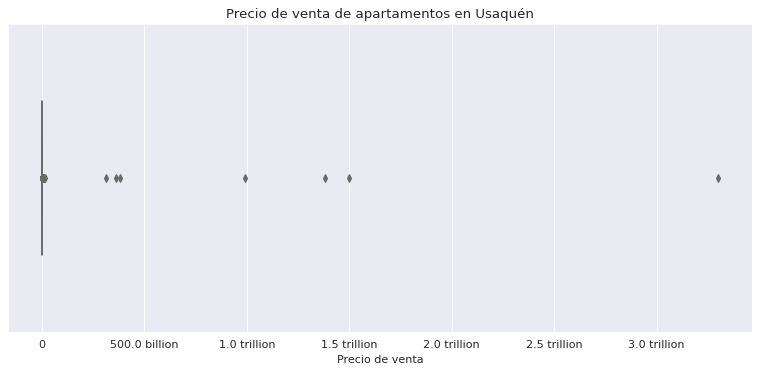

In [9]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    usaquen,
    x='precio_venta',
    width=.5,
    palette='Set3',
)

plt.title('Precio de venta de apartamentos en Usaquén')
plt.xlabel('Precio de venta')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

In [10]:
Q1 = usaquen['precio_venta'].quantile(0.25)
Q3 = usaquen['precio_venta'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - (1.5 * IQR)
if lower < 0:
    lower = Q1 - (0.5 * IQR)
upper = Q3 + (1.5 * IQR)

outliers = usaquen[(usaquen['precio_venta'] < lower) | (usaquen['precio_venta'] > upper)]
outliers.shape

(1094, 39)

In [11]:
usaquen = usaquen[(usaquen['precio_venta'] > lower) & (usaquen['precio_venta'] < upper)]
usaquen.shape

(19102, 39)

# Analisis Univariado

## Area (m2)

### Eliminar outliers

In [12]:
# eliminar area igual a 0

usaquen = usaquen[usaquen['area'] > 0]

Eliminamos las areas (m2) que son outliers

In [13]:
Q1 = usaquen['area'].quantile(0.25)
Q3 = usaquen['area'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

outliers = usaquen[(usaquen['area'] < lower) | (usaquen['area'] > upper)]
outliers.shape

(424, 39)

In [14]:
usaquen = usaquen[(usaquen['area'] > lower) & (usaquen['area'] < upper)]
usaquen.shape

(18645, 39)

### Analisis

In [15]:
usaquen.area.describe().apply(lambda x: humanize.intcomma(x)).to_frame().T

count               mean                 std  min   25%    50%  \
area  18,645.0  116.5874330919818  53.738634874927335  1.0  75.0  104.0   

        75%    max  
area  150.0  273.0

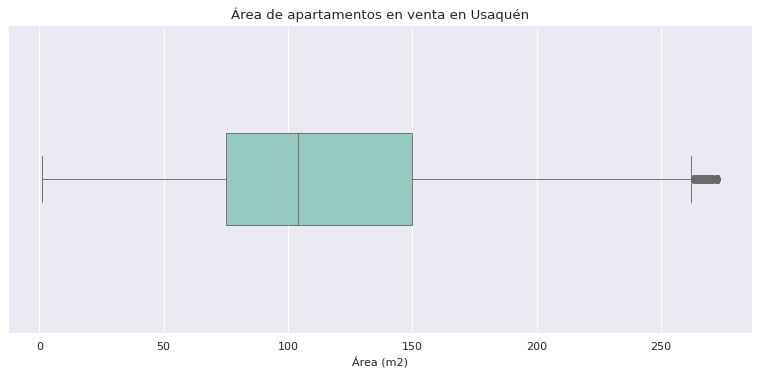

In [16]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    data=usaquen,
    x='area',
    width=.3,
    palette='Set3',
    linewidth=.8,
)

plt.title('Área de apartamentos en venta en Usaquén')
plt.xlabel('Área (m2)')
plt.show()

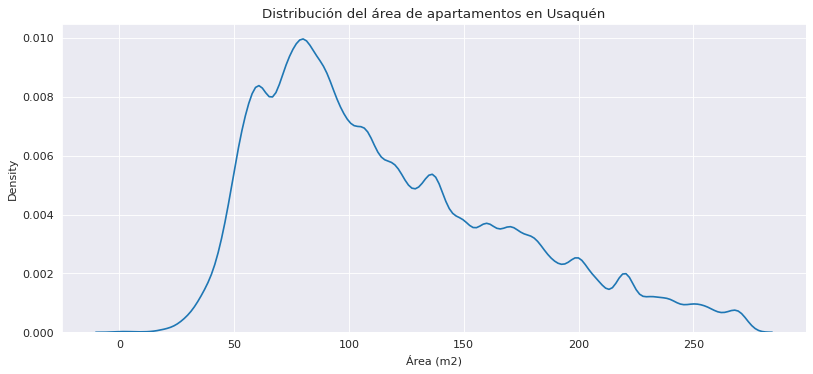

In [17]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    usaquen,
    x='area',
    bw_adjust=.5,
)

plt.title('Distribución del área de apartamentos en Usaquén')
plt.xlabel('Área (m2)')
plt.show()

### Cercania a Transmilenio

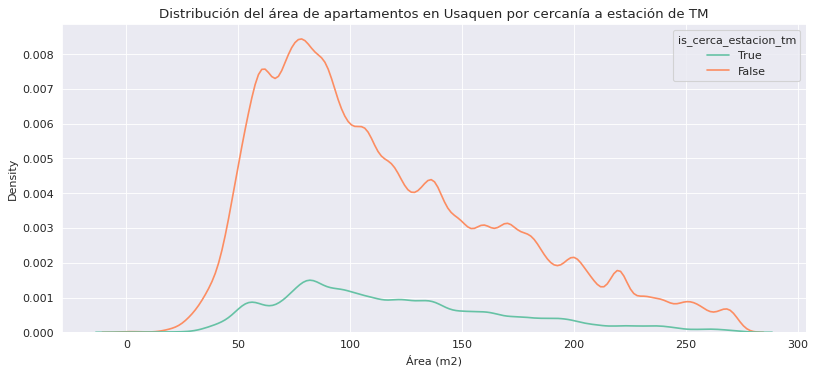

In [18]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    usaquen,
    x='area',
    bw_adjust=.5,
    hue='is_cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('Distribución del área de apartamentos en Usaquen por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.show()

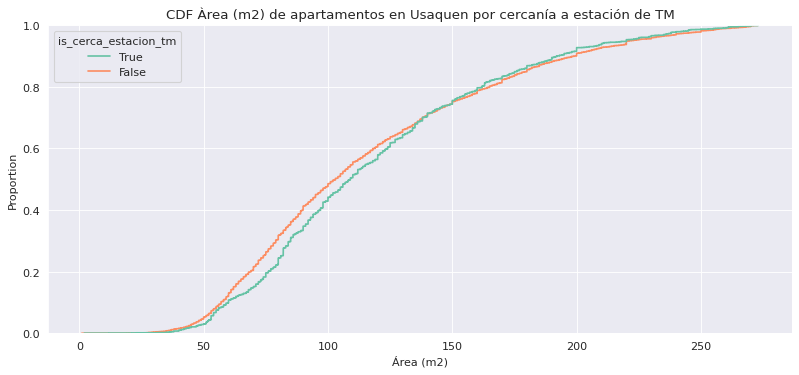

In [19]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    usaquen,
    x='area',
    hue='is_cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('CDF Àrea (m2) de apartamentos en Usaquen por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.show()


### Estrato

In [20]:
usaquen.groupby('estrato')['area'].describe().applymap(lambda x: round(x, 1))

count   mean   std   min    25%    50%    75%    max
estrato                                                       
0.0         8.0  137.9  52.9  67.0  111.2  124.5  160.8  245.0
1.0         4.0   98.5  50.6  60.0   61.5   83.0  120.0  168.0
2.0        41.0   58.0  35.7  35.0   46.0   49.0   56.2  256.0
3.0       748.0   61.0  22.7  27.0   49.2   58.1   68.0  240.0
4.0      4641.0   83.5  27.9   1.7   64.0   80.0   97.0  270.0
5.0      4867.0  112.9  46.0  17.0   80.0  105.0  138.0  270.0
6.0      8334.0  142.4  56.2   1.0   97.0  139.0  182.0  273.0

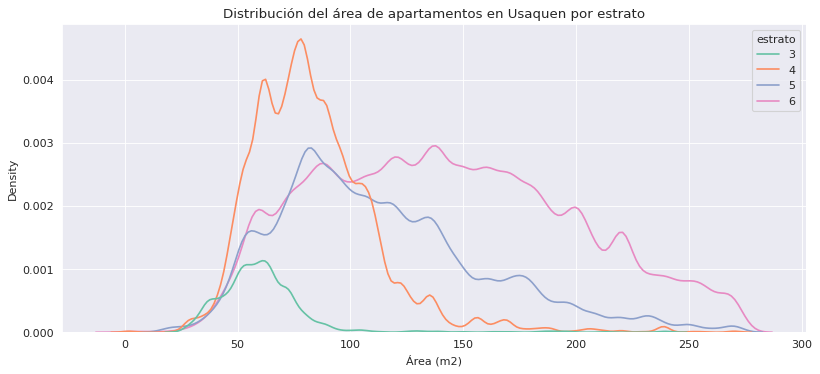

In [21]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    usaquen,
    x='area',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Usaquen por estrato')
plt.xlabel('Área (m2)')
plt.show()

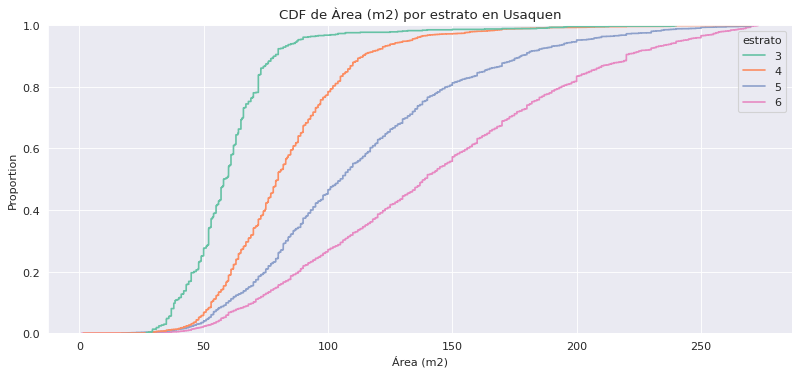

In [22]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    usaquen,
    x='area',
    hue='estrato',
    palette='Set2',
    hue_order=[3, 4, 5, 6],
)

plt.title('CDF de Àrea (m2) por estrato en Usaquen')
plt.xlabel('Área (m2)')
plt.show()

### Antiguedad

In [23]:
usaquen.groupby('antiguedad')['area'].describe().applymap(lambda x: round(x, 1))

count   mean   std   min   25%    50%    75%    max
antiguedad                                                              
ENTRE 0 Y 5 ANOS    2504.0   92.5  42.5  17.0  60.0   83.0  115.0  267.0
ENTRE 10 Y 20 ANOS  5117.0  119.7  53.8   2.0  77.0  108.4  153.0  273.0
ENTRE 5 Y 10 ANOS   3209.0  103.6  46.5   1.7  70.0   92.1  127.0  273.0
MAS DE 20 ANOS      7348.0  127.4  55.9   1.0  82.0  116.0  168.0  273.0
REMODELADO           457.0  129.7  58.9  29.4  80.0  120.0  174.0  273.0

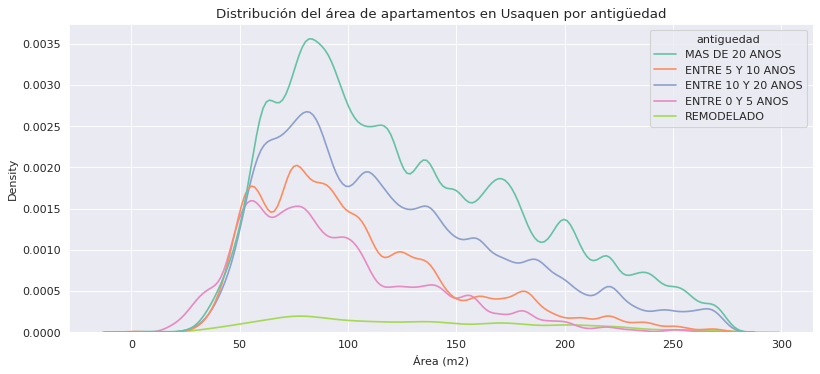

In [24]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    usaquen,
    x='area',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Usaquen por antigüedad')
plt.xlabel('Área (m2)')
plt.show()

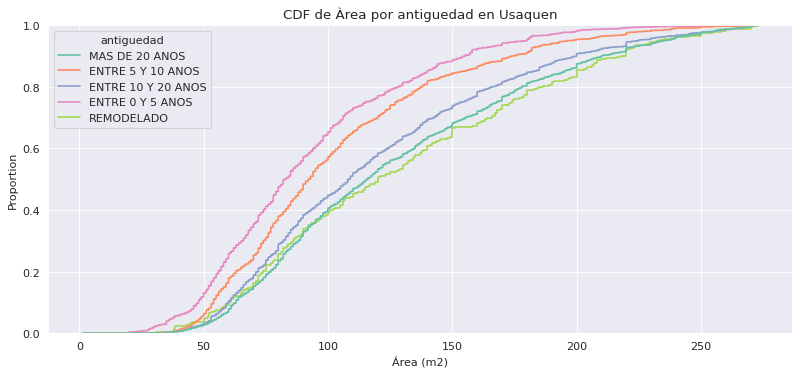

In [25]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    usaquen,
    x='area',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF de Àrea por antiguedad en Usaquen')
plt.xlabel('Área (m2)')
plt.show()

Lo apartamentos mas recientes tienden a tener un Àrea menor que los mas antiguos

### Estacion de TM Cercana

In [26]:
estacion_tm_cercana = usaquen[usaquen['is_cerca_estacion_tm'] == True]
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['area'].describe().applymap(lambda x: round(x, 1)).sort_values(by='mean', ascending=False)
estacion_tm_cercana_stats

count   mean   std   min    25%    50%    75%    max
estacion_tm_cercana                                                           
Calle 106                 663.0  143.3  53.1   2.0  106.0  140.0  180.0  272.8
Calle 100 - Marketmedios   65.0  134.6  52.7  40.0   96.0  130.0  173.0  261.1
Pepe Sierra               455.0  130.9  50.9  37.0   91.0  123.0  163.0  273.0
Calle 127                 433.0  124.6  46.9  36.3   94.0  117.0  151.0  270.0
Prado                     243.0  119.3  43.4  23.0   86.0  114.0  146.0  265.0
Mazurén                    32.0  103.3  16.6  60.0   99.1  112.0  112.0  130.0
Calle 146                  81.0  100.8  38.2  40.0   76.0   93.0  112.0  209.0
Terminal                    3.0   94.4  11.4  81.3   91.2  101.0  101.0  101.0
Calle 187                  58.0   87.5  31.5  41.0   70.0   77.2  101.0  180.0
Alcalá                    322.0   86.3  32.3  47.0   61.5   80.0   97.8  230.0
Calle 142                 201.0   83.7  27.8  21.1   60.0   80.0  102.0  200.0
Portal Norte               24.0   69.8  22.8  31.0   62.2   65.0   87.1  130.0
Calle 161                  47.0   68.7  21.0  48.6   58.0   63.0   74.5  190.0
Toberín - Foundever         4.0   57.3  10.8  43.0   53.6   58.6   62.2   69.0

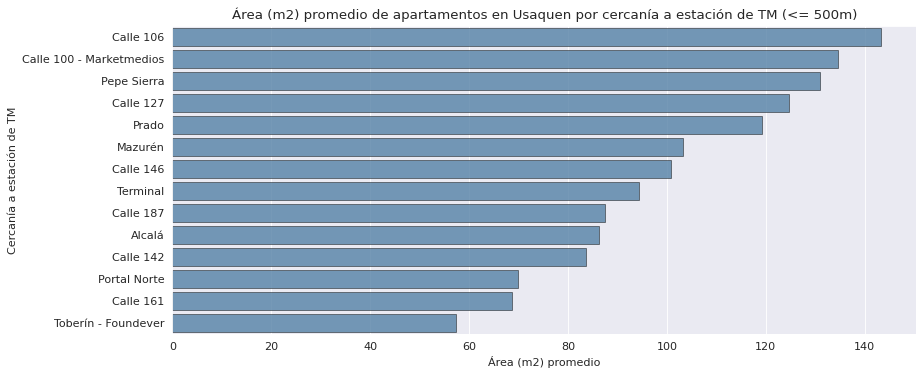

In [27]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='mean',
    # palette='Set2',
    color='steelblue',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Área (m2) promedio de apartamentos en Usaquen por cercanía a estación de TM (<= 500m)')
plt.xlabel('Área (m2) promedio')
plt.ylabel('Cercanía a estación de TM')
plt.show()

In [28]:
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['area'].describe().applymap(lambda x: round(x, 1)).sort_values(by='50%', ascending=False)

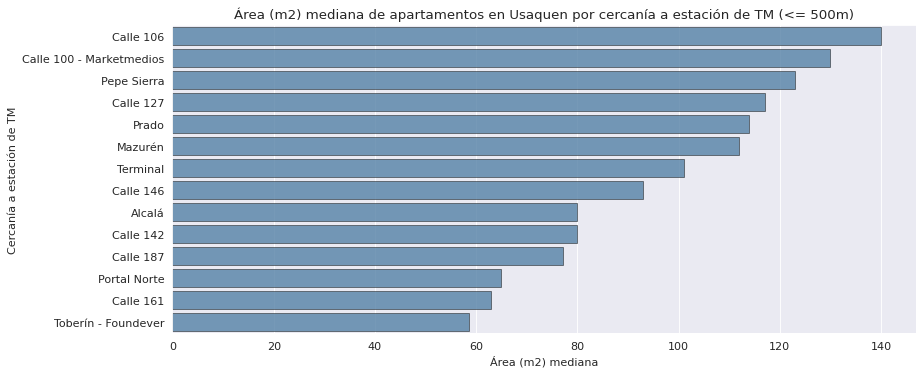

In [29]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='50%',
    # palette='Set2',
    color='steelblue',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Área (m2) mediana de apartamentos en Usaquen por cercanía a estación de TM (<= 500m)')
plt.xlabel('Área (m2) mediana')
plt.ylabel('Cercanía a estación de TM')
plt.show()

<Figure size 960x400 with 0 Axes>

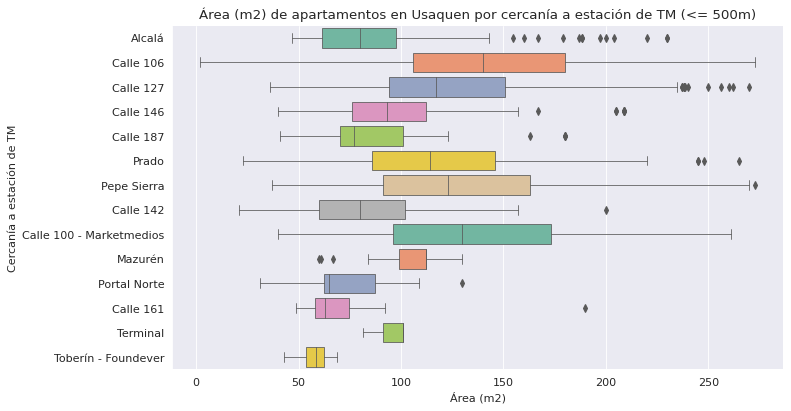

In [30]:
plt.figure(figsize=(12, 5))

sns.catplot(
    data=estacion_tm_cercana,
    x='area',
    y='estacion_tm_cercana',
    kind='box',
    height=5,
    aspect=2,
    palette='Set2',
    orient='h',
    linewidth=.7,
)

plt.title('Área (m2) de apartamentos en Usaquen por cercanía a estación de TM (<= 500m)')
plt.xlabel('Área (m2)')
plt.ylabel('Cercanía a estación de TM')
plt.show()

## Precio de venta

In [73]:
fig = px.scatter_mapbox(
    usaquen,
    lat='latitud',
    lon='longitud',
    color='precio_venta',
    size='area',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    mapbox_style='open-street-map',
    # mapbox_style='dark',
    title='Precio de venta y área de apartamentos en Usaquen',
    hover_name='barrio',
    hover_data=['area', 'precio_venta', 'estrato', 'antiguedad', 'is_cerca_estacion_tm', 'estacion_tm_cercana'],
)

fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(
        title='Precio de venta',
        tickformat='s',
    ),
)

fig.write_html('../../html/precio_area_usaquen.html')

fig.show()

In [32]:
usaquen.precio_venta.describe().apply(lambda x: humanize.intword(x)).to_frame().T

count           mean            std            min  \
precio_venta  18.6 thousand  733.8 million  403.4 million  120.0 million   

                        25%            50%            75%          max  
precio_venta  425.0 million  620.0 million  950.0 million  2.1 billion

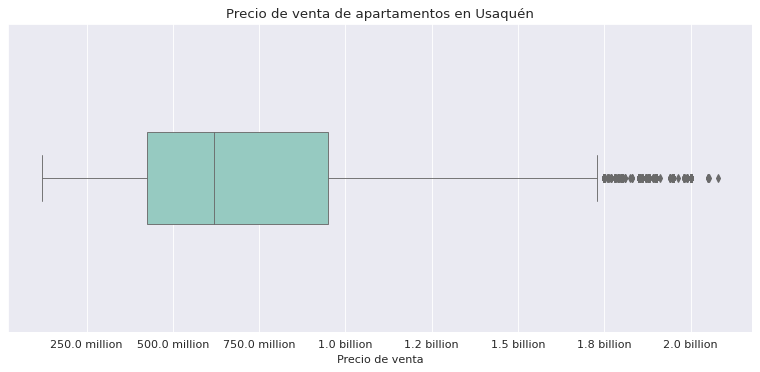

In [33]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    usaquen,
    x='precio_venta',
    width=.3,
    palette='Set3',
    linewidth=.8,
)

plt.title('Precio de venta de apartamentos en Usaquén')
plt.xlabel('Precio de venta')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

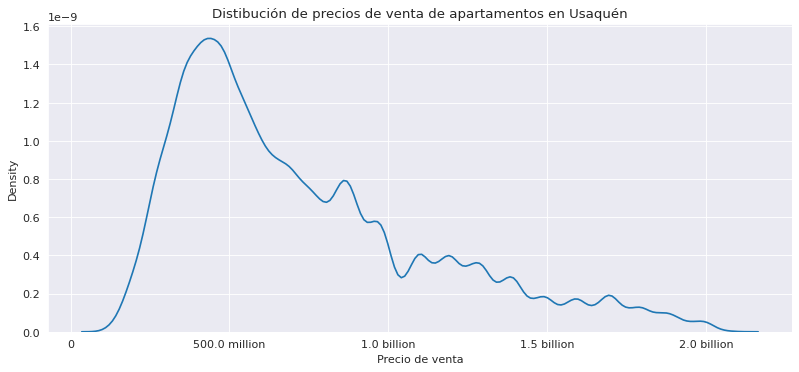

In [34]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    usaquen,
    x='precio_venta',
    bw_adjust=.5,
)

plt.title('Distibución de precios de venta de apartamentos en Usaquén')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Barrios

In [35]:
top_barrios = usaquen.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('precio_venta', 'mean'),
    median=('precio_venta', 'median'),
    std=('precio_venta', 'std'),
)

# escoger los que tienen más de 20 registros para que sea más representativo
top_barrios_mean = top_barrios[top_barrios['count'] > 20].sort_values('mean', ascending=False).head(10)
top_barrios_mean.applymap(lambda x: humanize.intword(x))

count         mean       median  \
barrio                                                                
MONTEARROYO                            52  1.6 billion  1.7 billion   
BOSQUES DE MEDINA                     200  1.6 billion  1.6 billion   
RESERVAS DE LA SIERRA - LA ARBOLEDA    93  1.6 billion  1.7 billion   
SIERRAS DEL MORAL                      99  1.6 billion  1.7 billion   
AGUA DULCE                             27  1.6 billion  1.8 billion   
GINEBRA                                92  1.4 billion  1.6 billion   
SANTA ANA ORIENTAL                     79  1.4 billion  1.5 billion   
LA CANADA                              78  1.4 billion  1.3 billion   
LOS ALPES II SECTOR                    98  1.4 billion  1.4 billion   
S.C. BARRANCAS ORIENTAL                24  1.2 billion  1.4 billion   

                                               std  
barrio                                              
MONTEARROYO                          231.0 million  
BOSQUES DE MEDINA                    269.0 million  
RESERVAS DE LA SIERRA - LA ARBOLEDA  243.3 million  
SIERRAS DEL MORAL                    371.8 million  
AGUA DULCE                           514.6 million  
GINEBRA                              404.0 million  
SANTA ANA ORIENTAL                   404.4 million  
LA CANADA                            207.1 million  
LOS ALPES II SECTOR                  232.7 million  
S.C. BARRANCAS ORIENTAL              586.0 million

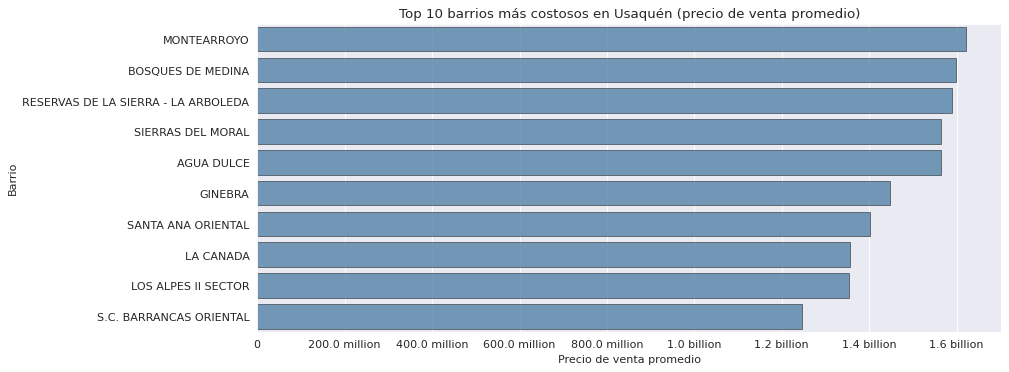

In [36]:
plt.figure(figsize=(12, 5), dpi=80)

sns.barplot(
    top_barrios_mean,
    y=top_barrios_mean.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Top 10 barrios más costosos en Usaquén (precio de venta promedio)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))

plt.show()

In [37]:
top_barrios_median = top_barrios[top_barrios['count'] > 20].sort_values('median', ascending=False).head(10)
top_barrios_median.applymap(lambda x: humanize.intword(x))

count         mean       median  \
barrio                                                                
AGUA DULCE                             27  1.6 billion  1.8 billion   
RESERVAS DE LA SIERRA - LA ARBOLEDA    93  1.6 billion  1.7 billion   
SIERRAS DEL MORAL                      99  1.6 billion  1.7 billion   
MONTEARROYO                            52  1.6 billion  1.7 billion   
BOSQUES DE MEDINA                     200  1.6 billion  1.6 billion   
GINEBRA                                92  1.4 billion  1.6 billion   
SANTA ANA ORIENTAL                     79  1.4 billion  1.5 billion   
LOS ALPES II SECTOR                    98  1.4 billion  1.4 billion   
S.C. BARRANCAS ORIENTAL                24  1.2 billion  1.4 billion   
LA CANADA                              78  1.4 billion  1.3 billion   

                                               std  
barrio                                              
AGUA DULCE                           514.6 million  
RESERVAS DE LA SIERRA - LA ARBOLEDA  243.3 million  
SIERRAS DEL MORAL                    371.8 million  
MONTEARROYO                          231.0 million  
BOSQUES DE MEDINA                    269.0 million  
GINEBRA                              404.0 million  
SANTA ANA ORIENTAL                   404.4 million  
LOS ALPES II SECTOR                  232.7 million  
S.C. BARRANCAS ORIENTAL              586.0 million  
LA CANADA                            207.1 million

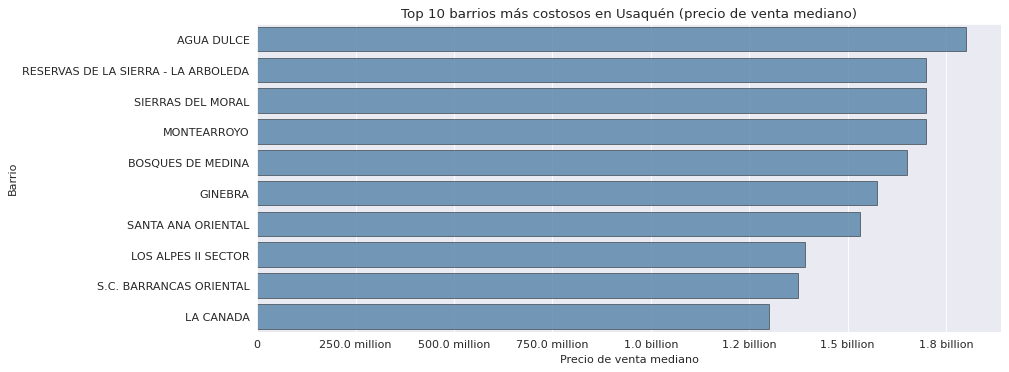

In [38]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios_median,
    y=top_barrios_median.index,
    x='median',
    color='steelblue',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Top 10 barrios más costosos en Usaquén (precio de venta mediano)')
plt.xlabel('Precio de venta mediano')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

In [39]:
top_barrios_economicos = usaquen.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('precio_venta', 'mean'),
    median=('precio_venta', 'median'),
    std=('precio_venta', 'std'),
)

top_barrios_economicos_mean = top_barrios_economicos[top_barrios_economicos['count'] > 10].sort_values('mean', ascending=True).head(10)
top_barrios_economicos_mean.applymap(lambda x: humanize.intword(x))

count           mean         median  \
barrio                                                                
URB. CARRERA 32 186-07             14  153.5 million  148.0 million   
HORIZONTES USAQUEN                 13  183.0 million  182.0 million   
SAN JOSE DE USAQUEN - URB. ARGO    36  192.3 million  187.5 million   
TIBABITA I                         11  206.6 million  199.5 million   
TIBABITA II                        16  212.6 million  178.5 million   
SAN ANTONIO NORTE II SECTOR        17  215.2 million  195.0 million   
SAN ANTONIO NORTE                  52  226.4 million  244.0 million   
TOBERIN                            45  243.1 million  230.0 million   
LAS ORQUIDEAS                      51  251.3 million  255.0 million   
LOS NARANJOS                       16  253.7 million  235.0 million   

                                          std  
barrio                                         
URB. CARRERA 32 186-07           14.4 million  
HORIZONTES USAQUEN               34.1 million  
SAN JOSE DE USAQUEN - URB. ARGO  25.6 million  
TIBABITA I                       45.9 million  
TIBABITA II                      81.7 million  
SAN ANTONIO NORTE II SECTOR      63.6 million  
SAN ANTONIO NORTE                51.3 million  
TOBERIN                          85.3 million  
LAS ORQUIDEAS                    46.2 million  
LOS NARANJOS                     47.7 million

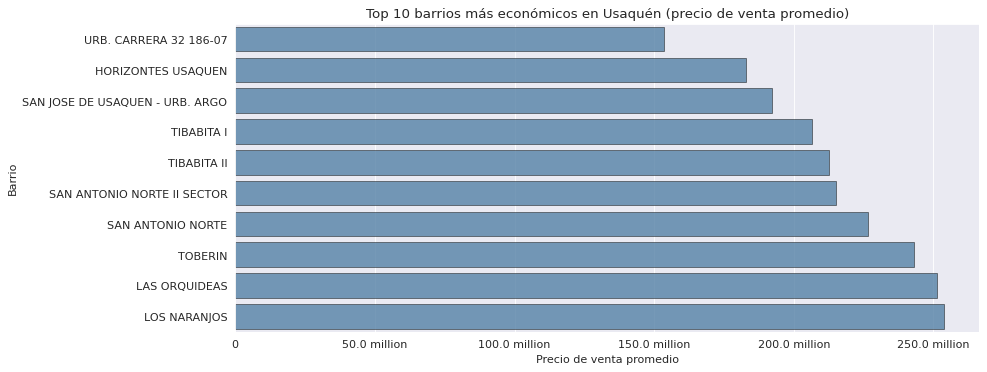

In [40]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios_economicos_mean,
    y=top_barrios_economicos_mean.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Top 10 barrios más económicos en Usaquén (precio de venta promedio)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))

plt.show()

In [41]:
top_barrios_economicos_median = top_barrios_economicos[top_barrios_economicos['count'] > 10].sort_values('median', ascending=True).head(10)
top_barrios_economicos_median.applymap(lambda x: humanize.intword(x))

count           mean         median  \
barrio                                                                
URB. CARRERA 32 186-07             14  153.5 million  148.0 million   
TIBABITA II                        16  212.6 million  178.5 million   
HORIZONTES USAQUEN                 13  183.0 million  182.0 million   
SAN JOSE DE USAQUEN - URB. ARGO    36  192.3 million  187.5 million   
SAN ANTONIO NORTE II SECTOR        17  215.2 million  195.0 million   
TIBABITA I                         11  206.6 million  199.5 million   
LA GRANJA NORTE                    70  296.7 million  230.0 million   
TOBERIN                            45  243.1 million  230.0 million   
EL_JARDIN                          15  263.1 million  230.0 million   
LOS NARANJOS                       16  253.7 million  235.0 million   

                                           std  
barrio                                          
URB. CARRERA 32 186-07            14.4 million  
TIBABITA II                       81.7 million  
HORIZONTES USAQUEN                34.1 million  
SAN JOSE DE USAQUEN - URB. ARGO   25.6 million  
SAN ANTONIO NORTE II SECTOR       63.6 million  
TIBABITA I                        45.9 million  
LA GRANJA NORTE                  120.6 million  
TOBERIN                           85.3 million  
EL_JARDIN                         63.1 million  
LOS NARANJOS                      47.7 million

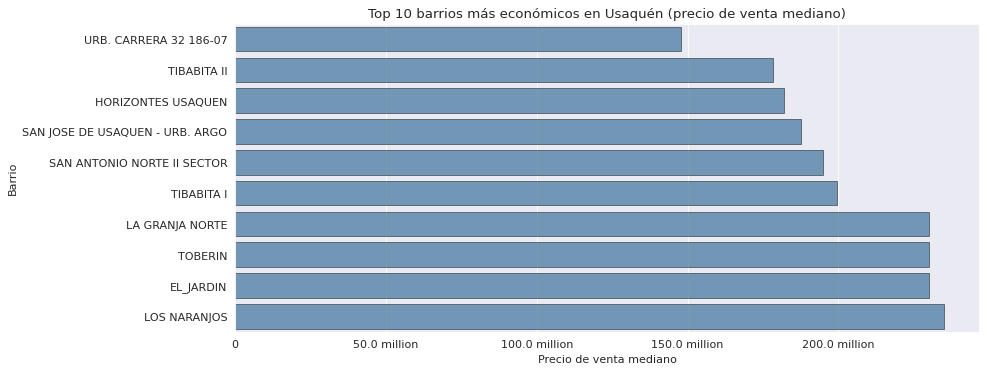

In [42]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios_economicos_median,
    y=top_barrios_economicos_median.index,
    x='median',
    color='steelblue',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Top 10 barrios más económicos en Usaquén (precio de venta mediano)')
plt.xlabel('Precio de venta mediano')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Cercania a Transmilenio

In [43]:
usaquen.groupby('is_cerca_estacion_tm')['precio_venta'].describe().applymap(lambda x: humanize.intcomma(x))

count                 mean                  std  \
is_cerca_estacion_tm                                                       
0                     16,014.0  729,854,866.8490696  408,544,919.2606845   
1                      2,631.0  757,638,735.2352718  369,963,083.1510524   

                                min            25%            50%  \
is_cerca_estacion_tm                                                
0                     120,000,000.0  420,000,000.0  600,000,000.0   
1                     183,300,000.0  469,350,000.0  680,000,000.0   

                                75%              max  
is_cerca_estacion_tm                                  
0                     950,000,000.0  2,080,000,000.0  
1                     950,000,000.0  2,000,000,000.0

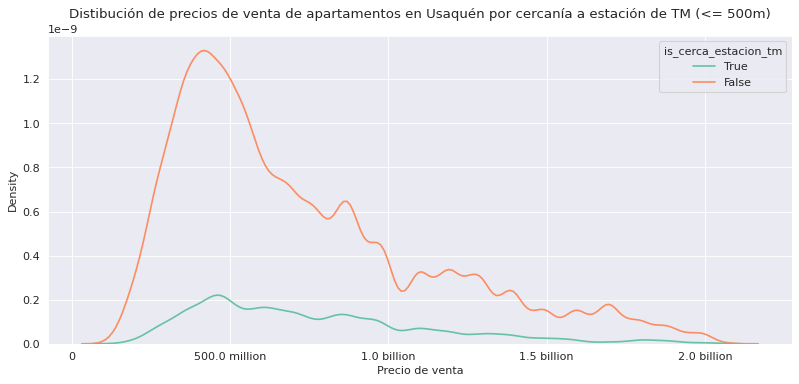

In [44]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    usaquen,
    x='precio_venta',
    bw_adjust=.5,
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Usaquén por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

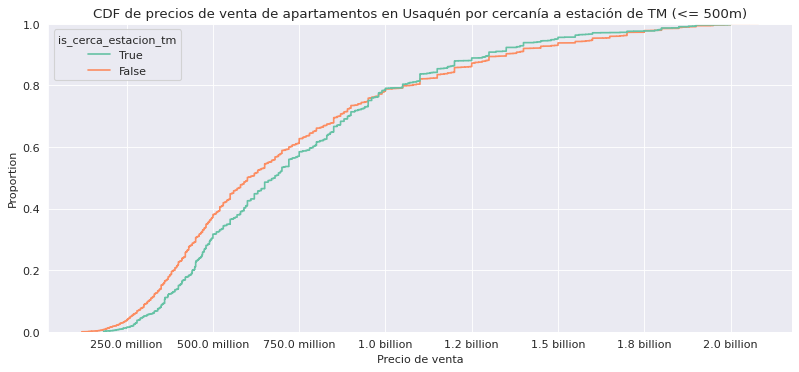

In [45]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    usaquen,
    x='precio_venta',
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Usaquén por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Estrato

In [46]:
usaquen.groupby('estrato')['precio_venta'].describe().applymap(lambda x: humanize.intword(x))

count           mean            std            min  \
estrato                                                              
0.0                 8  915.0 million  320.6 million  510.0 million   
1.0                 4  639.1 million  432.6 million  361.6 million   
2.0                41  288.2 million  255.1 million  165.0 million   
3.0               748  275.2 million  152.6 million  120.0 million   
4.0      4.6 thousand  441.2 million  158.2 million  169.9 million   
5.0      4.9 thousand  704.6 million  316.6 million  190.0 million   
6.0      8.3 thousand  956.9 million  413.8 million  188.5 million   

                   25%            50%            75%          max  
estrato                                                            
0.0      780.0 million  895.0 million    1.0 billion  1.6 billion  
1.0      386.6 million  457.5 million  710.0 million  1.3 billion  
2.0      195.0 million  223.0 million  258.0 million  1.7 billion  
3.0      200.0 million  250.0 million  290.0 million  1.9 billion  
4.0      330.0 million  414.0 million  520.0 million  1.7 billion  
5.0      468.0 million  630.0 million  870.0 million  2.1 billion  
6.0      625.0 million  890.0 million    1.2 billion  2.1 billion

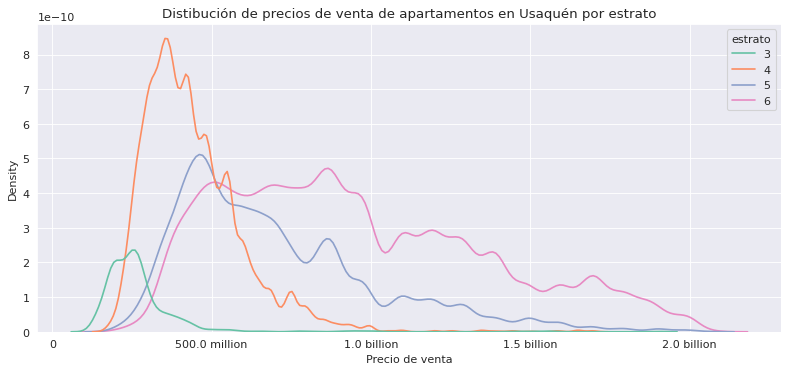

In [47]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    usaquen,
    x='precio_venta',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Usaquén por estrato')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

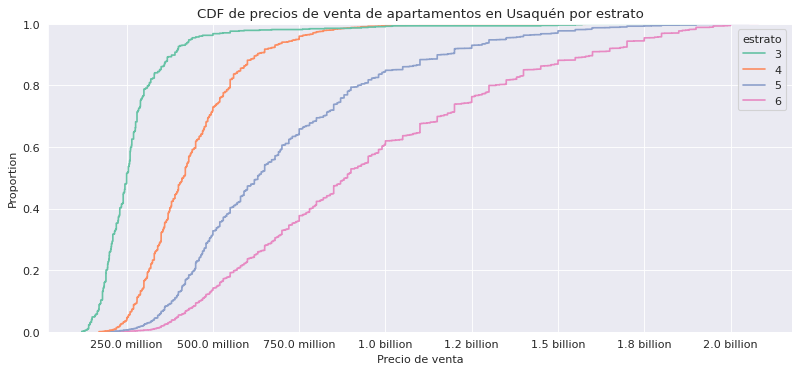

In [48]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    usaquen,
    x='precio_venta',
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Usaquén por estrato')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Antiguedad del apartamento

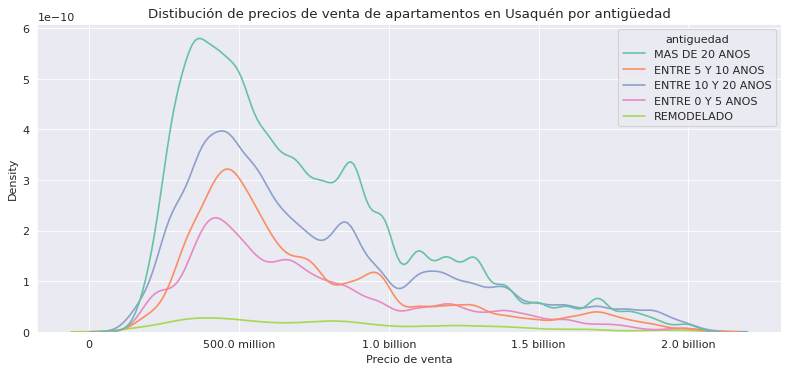

In [49]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    usaquen,
    x='precio_venta',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Usaquén por antigüedad')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

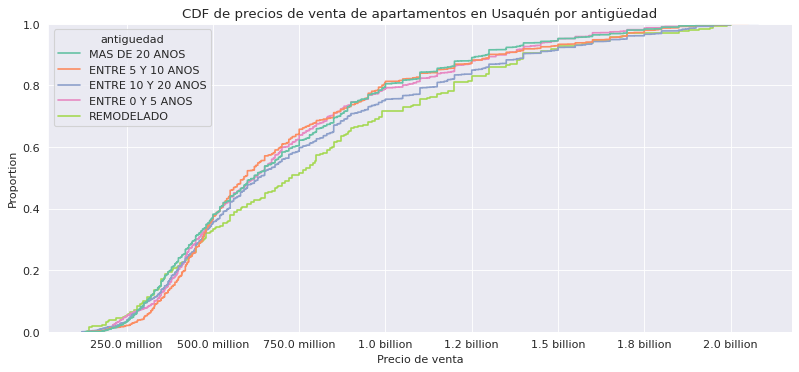

In [50]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    usaquen,
    x='precio_venta',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Usaquén por antigüedad')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Estacion de TM Cercana

In [51]:
estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False).applymap(lambda x: humanize.intword(x))

count           mean            std            min  \
estacion_tm_cercana                                                           
Calle 106                  663    1.0 billion  391.3 million  310.0 million   
Calle 100 - Marketmedios    65  861.5 million  341.7 million  280.0 million   
Pepe Sierra                455  832.5 million  344.4 million  280.0 million   
Calle 127                  433  809.4 million  279.7 million  255.0 million   
Prado                      243  714.9 million  330.6 million  183.3 million   
Alcalá                     322  535.6 million  183.5 million  265.0 million   
Mazurén                     32  534.4 million  103.6 million  275.0 million   
Calle 146                   81  493.4 million  258.8 million  250.0 million   
Calle 142                  201  444.4 million  149.2 million  210.0 million   
Terminal                     3  388.3 million   34.0 million  350.0 million   
Calle 187                   58  368.9 million  131.3 million  185.0 million   
Portal Norte                24  337.1 million  126.1 million  190.0 million   
Calle 161                   47  297.4 million   97.4 million  190.0 million   
Toberín - Foundever          4  285.8 million  110.3 million  184.1 million   

                                    25%            50%            75%  \
estacion_tm_cercana                                                     
Calle 106                 720.0 million  949.0 million    1.3 billion   
Calle 100 - Marketmedios  620.0 million  830.0 million  980.0 million   
Pepe Sierra               550.0 million  780.0 million    1.0 billion   
Calle 127                 595.0 million  800.0 million  960.0 million   
Prado                     451.0 million  600.0 million  945.0 million   
Alcalá                    420.0 million  480.0 million  630.0 million   
Mazurén                   478.8 million  600.0 million  600.0 million   
Calle 146                 352.5 million  410.0 million  500.0 million   
Calle 142                 340.0 million  420.0 million  500.0 million   
Terminal                  375.0 million  400.0 million  407.5 million   
Calle 187                 277.0 million  370.0 million  421.0 million   
Portal Norte              228.8 million  285.0 million  442.5 million   
Calle 161                 255.1 million  275.0 million  291.5 million   
Toberín - Foundever       214.8 million  262.0 million  333.0 million   

                                    max  
estacion_tm_cercana                      
Calle 106                   2.0 billion  
Calle 100 - Marketmedios    2.0 billion  
Pepe Sierra                 2.0 billion  
Calle 127                   2.0 billion  
Prado                       2.0 billion  
Alcalá                      1.5 billion  
Mazurén                   605.0 million  
Calle 146                   1.4 billion  
Calle 142                 980.0 million  
Terminal                  415.0 million  
Calle 187                 900.0 million  
Portal Norte              560.0 million  
Calle 161                 850.0 million  
Toberín - Foundever       435.0 million

In [52]:
estacion_tm_cercana_stats_mean = estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False)
estacion_tm_cercana_stats_median = estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('50%', ascending=False)

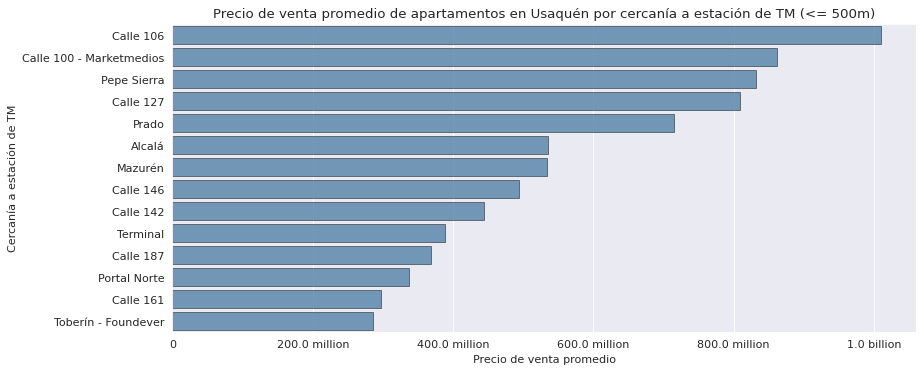

In [53]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats_mean,
    y=estacion_tm_cercana_stats_mean.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Precio de venta promedio de apartamentos en Usaquén por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Cercanía a estación de TM')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

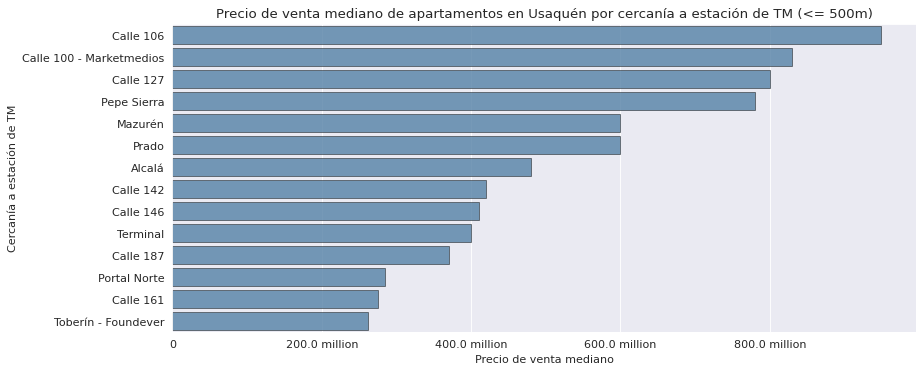

In [54]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats_median,
    y=estacion_tm_cercana_stats_median.index,
    x='50%',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Precio de venta mediano de apartamentos en Usaquén por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta mediano')
plt.ylabel('Cercanía a estación de TM')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

<Figure size 960x400 with 0 Axes>

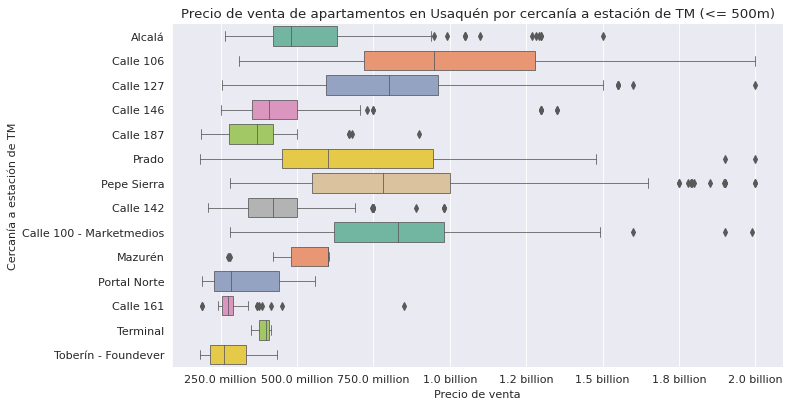

In [55]:
plt.figure(figsize=(12, 5))

sns.catplot(
    data=estacion_tm_cercana,
    x='precio_venta',
    y='estacion_tm_cercana',
    kind='box',
    height=5,
    aspect=2,
    palette='Set2',
    orient='h',
    linewidth=.7,
)

plt.title('Precio de venta de apartamentos en Usaquén por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta')
plt.ylabel('Cercanía a estación de TM')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Precios Anteriores Vs Actuales

In [56]:
#selcionar todos los datos qut no tenga la columna precio_venta_anterior nula
usaquen_ant = usaquen[usaquen['precio_venta_anterior'].notna()]
usaquen_ant = usaquen_ant[usaquen_ant['fecha_actualizacion_precio_venta'].dt.month == 10]
usaquen_ant.shape

(403, 39)

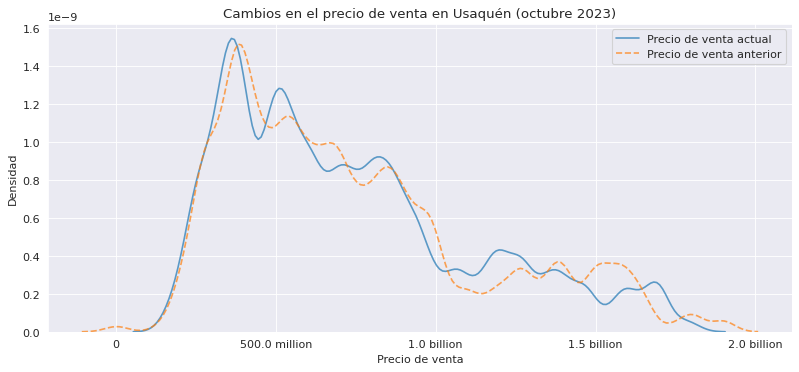

In [57]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    usaquen_ant,
    x='precio_venta',
    bw_adjust=.3,
    label='Precio de venta actual',
    alpha=.7,
)

sns.kdeplot(
    usaquen_ant,
    x='precio_venta_anterior',
    bw_adjust=.3,
    label='Precio de venta anterior',
    alpha=.7,
    linestyle='--',
)

plt.title('Cambios en el precio de venta en Usaquén (octubre 2023)')
plt.xlabel('Precio de venta')
plt.ylabel('Densidad')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.legend()
plt.show()

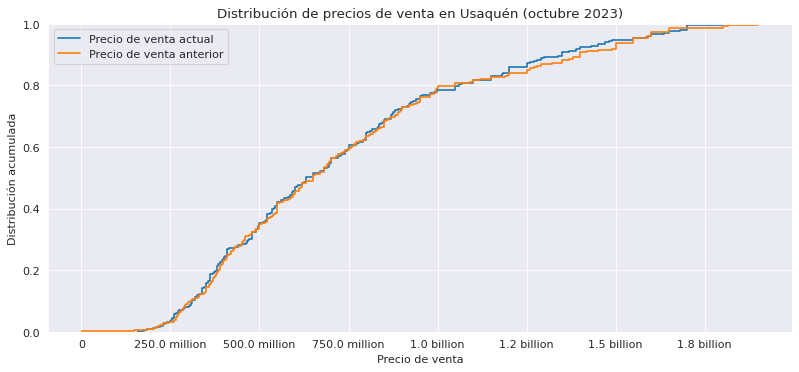

In [58]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    usaquen_ant,
    x='precio_venta',
    label='Precio de venta actual',
)

sns.ecdfplot(
    usaquen_ant,
    x='precio_venta_anterior',
    label='Precio de venta anterior',
    # alpha=.7
)

plt.title('Distribución de precios de venta en Usaquén (octubre 2023)')
plt.xlabel('Precio de venta')
plt.ylabel('Distribución acumulada')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.legend()
plt.show()

In [59]:
usaquen_ant.precio_venta.describe().apply(lambda x: humanize.intword(x)).to_frame().T

count           mean            std            min  \
precio_venta   403  731.6 million  389.3 million  159.0 million   

                        25%            50%            75%          max  
precio_venta  409.0 million  630.0 million  935.0 million  1.8 billion

In [60]:
usaquen_ant.precio_venta.describe().apply(lambda x: humanize.intword(x))

count              403
mean     731.6 million
std      389.3 million
min      159.0 million
25%      409.0 million
50%      630.0 million
75%      935.0 million
max        1.8 billion
Name: precio_venta, dtype: object

In [61]:
usaquen_ant.precio_venta_anterior.describe().apply(lambda x: humanize.intword(x)).to_frame().T

count           mean            std          min  \
precio_venta_anterior   403  742.0 million  401.7 million  1.3 million   

                                 25%            50%            75%  \
precio_venta_anterior  412.6 million  650.0 million  950.0 million   

                               max  
precio_venta_anterior  1.9 billion

In [62]:
usaquen.precio_venta_anterior.describe().apply(lambda x: humanize.intword(x))

count     1.4 thousand
mean       1.8 billion
std       40.1 billion
min        1.3 million
25%      412.1 million
50%      596.0 million
75%      919.2 million
max       1.5 trillion
Name: precio_venta_anterior, dtype: object

## Antiguedad

In [63]:
usaquen.antiguedad.value_counts()

antiguedad
MAS DE 20 ANOS        7348
ENTRE 10 Y 20 ANOS    5117
ENTRE 5 Y 10 ANOS     3209
ENTRE 0 Y 5 ANOS      2504
REMODELADO             457
Name: count, dtype: int64

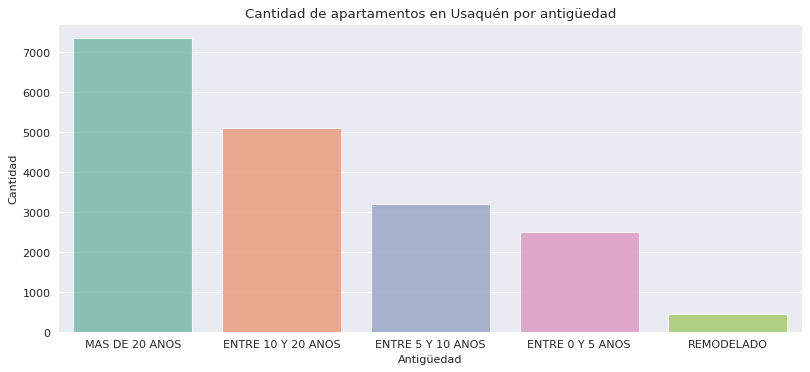

In [64]:
plt.figure(figsize=(12, 5))

sns.countplot(
    usaquen,
    x='antiguedad',
    order=usaquen.antiguedad.value_counts().index,
    palette='Set2',
    # edgecolor='black',
    # linewidth=.5,
    alpha=.8,
)

plt.title('Cantidad de apartamentos en Usaquén por antigüedad')
plt.xlabel('Antigüedad')
plt.ylabel('Cantidad')
plt.show()

### Barrios

In [65]:
usaquen.groupby('antiguedad')['barrio'].describe()

count unique                       top freq
antiguedad                                                    
ENTRE 0 Y 5 ANOS    2486    121  SANTA BARBARA OCCIDENTAL  251
ENTRE 10 Y 20 ANOS  5100    154              SAN PATRICIO  410
ENTRE 5 Y 10 ANOS   3190    134  SANTA BARBARA OCCIDENTAL  328
MAS DE 20 ANOS      7277    148  SANTA BARBARA OCCIDENTAL  640
REMODELADO           451     89             SANTA BIBIANA   36

In [66]:
usaquen.groupby('antiguedad')['area'].describe().apply(lambda x: round(x,1))

count   mean   std   min   25%    50%    75%    max
antiguedad                                                              
ENTRE 0 Y 5 ANOS    2504.0   92.5  42.5  17.0  60.0   83.0  115.0  267.0
ENTRE 10 Y 20 ANOS  5117.0  119.7  53.8   2.0  77.0  108.4  153.0  273.0
ENTRE 5 Y 10 ANOS   3209.0  103.6  46.5   1.7  70.0   92.1  127.0  273.0
MAS DE 20 ANOS      7348.0  127.4  55.9   1.0  82.0  116.0  168.0  273.0
REMODELADO           457.0  129.7  58.9  29.4  80.0  120.0  174.0  273.0

In [67]:
usaquen.groupby('barrio')['antiguedad'].describe().sort_values(by='count', ascending=False).head(10)

count unique                 top freq
barrio                                                              
SANTA BARBARA OCCIDENTAL        1655      5      MAS DE 20 ANOS  640
SAN PATRICIO                    1334      5      MAS DE 20 ANOS  464
SANTA BIBIANA                   1288      5      MAS DE 20 ANOS  502
SANTA BARBARA CENTRAL I Y II     621      5  ENTRE 10 Y 20 ANOS  176
RINCON DEL CHICO                 602      5      MAS DE 20 ANOS  313
CEDRITOS                         602      5      MAS DE 20 ANOS  233
SANTA BARBARA CENTRAL I SECTOR   589      5      MAS DE 20 ANOS  340
LISBOA_                          586      5  ENTRE 10 Y 20 ANOS  299
BELLA SUIZA                      554      5      MAS DE 20 ANOS  190
LA_CAROLINA                      548      5      MAS DE 20 ANOS  324

### Estrato

In [68]:
usaquen.barrio.unique()

array(['SAN PATRICIO', 'GINEBRA', 'URB. SANTACOLOMA', 'CEDRO SALAZAR',
       'VILLAS DEL MEDITERRANEO', 'S.C. LA CAROLINA', 'CEDRITOS',
       'PARQUES DE LORENA', 'EL_VERGEL', 'SANTA BARBARA NORTE',
       'SANTA BIBIANA', 'SANTA BARBARA OCCIDENTAL',
       'SANTA BARBARA CENTRAL I Y II', 'ACACIAS USAQUEN',
       'SANTA BARBARA CENTRAL III SECTOR', 'VILLAS DE ARANJUEZ',
       'LOS CEDROS', 'RINCON DEL CHICO', 'LOS CEDRITOS',
       'SANTA BARBARA CENTRAL I SECTOR', nan,
       'SANTA BARBARA CENTRAL II SECTOR', 'LISBOA_', 'LA EMILIA',
       'COUNTRY CLUB', 'BOSQUES DE MEDINA', 'LOS CAOBOS', 'MOLINOS NORTE',
       'BARRANCAS PERLAS DEL NORTE',
       'RESERVAS DE LA SIERRA - LA ARBOLEDA', 'LOS ALPES II SECTOR',
       'CEDRO NARVAEZ', 'LA_CAROLINA', 'LA CALLEJA', 'EL MORAL',
       'LA CALLEJA SANTACOLOMA', 'MARANTA I Y II Y III SECTOR',
       'LA LIBERIA', 'EL CONTADOR', 'BOSQUE DE PINOS III',
       'URB. FURATENA', 'GINEBRA NORTE', 'CAOBOS SALAZAR',
       'VILLAS DE ANDALUCIA

In [69]:
usaquen.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('estrato', 'mean'),
    median=('estrato', 'median'),
    std=('estrato', 'std'),
).sort_values(by='count', ascending=False).head(10)

count      mean  median       std
barrio                                                           
SANTA BARBARA OCCIDENTAL         1657  5.440217     5.0  0.535214
SAN PATRICIO                     1335  5.937079     6.0  0.277484
SANTA BIBIANA                    1289  5.941815     6.0  0.240723
SANTA BARBARA CENTRAL I Y II      621  5.885668     6.0  0.399359
RINCON DEL CHICO                  602  5.607973     6.0  0.609795
CEDRITOS                          602  4.297342     4.0  0.492499
SANTA BARBARA CENTRAL I SECTOR    589  5.855688     6.0  0.375104
LISBOA_                           586  4.959044     5.0  0.415546
BELLA SUIZA                       554  5.039711     5.0  0.368582
LA_CAROLINA                       548  5.950730     6.0  0.269300

## Barrios

In [70]:
usaquen.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10)

codigo
barrio                                
SANTA BARBARA OCCIDENTAL          1657
SAN PATRICIO                      1335
SANTA BIBIANA                     1289
SANTA BARBARA CENTRAL I Y II       621
RINCON DEL CHICO                   602
CEDRITOS                           602
SANTA BARBARA CENTRAL I SECTOR     589
LISBOA_                            586
BELLA SUIZA                        554
LA_CAROLINA                        548

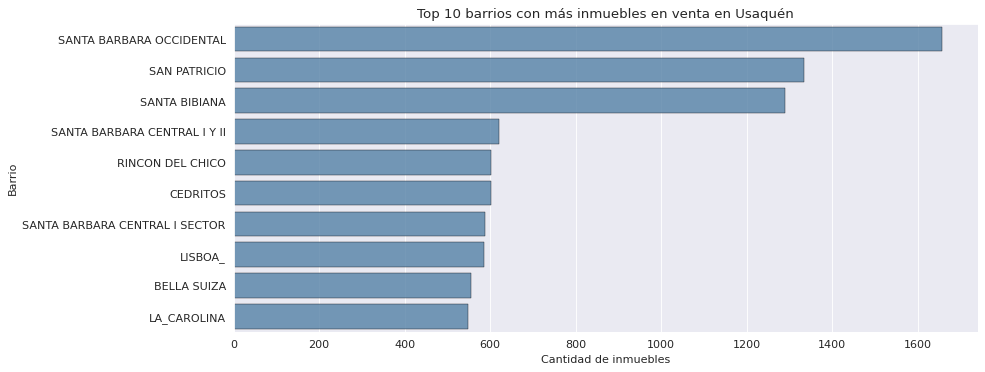

In [71]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=usaquen.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10),
    x='codigo',
    y=usaquen.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10).index,
    # palette='Set2',
    color='steelblue',
    orient='h',
    edgecolor='black',
    linewidth=.4,
    alpha=.8
)

plt.title('Top 10 barrios con más inmuebles en venta en Usaquén')
plt.xlabel('Cantidad de inmuebles')
plt.ylabel('Barrio')
plt.show()